In [ ]:
import random

from typing import List, Tuple

# Лабороторная работа №1: Методы сортировки

Вариант 11

# Топографическая сортировка (Topological sort)

Классификация алгоритма:
1.Устойчивость:
Алгоритмы топологической сортировки всегда устойчивы, так как они не работают с ключами элементов, а определяют порядок выполнения задач на основе зависимостей между ними.
2.Место хранения данных:
Алгоритмы топологической сортировки выполняются в памяти компьютера и не требуют дополнительного выделения места.
3.Выделение дополнительного места:
Алгоритмы топологической сортировки не требуют выделения дополнительного места для хранения данных.
4.Адаптивность:
Алгоритмы топологической сортировки не являются адаптивными, так как их производительность не зависит от расположения элементов во входных данных.
5.Сложность:
Сложность алгоритмов топологической сортировки составляет O(|V| + |E|), где |V| - число вершин графа, а |E| - число ребер.
6.Методы сортировки:
Алгоритмы топологической сортировки основаны на алгоритме поиска в глубину (DFS) или на алгоритме Кана (алгоритме, основанном на удалении вершин без входящих ребер).

# Теоретическое описание алгоритма

Топологическая сортировка (Topological sort) — один из основных алгоритмов на графах, который применяется для решения множества более сложных задач. 
Задача топологической сортировки графа состоит в следующем: указать такой линейный порядок на его вершинах, чтобы любое ребро вело от вершины с меньшим номером к вершине с большим номером. Очевидно, что если в графе есть циклы, то такого порядка не существует. 
Ориентированной сетью (или просто сетью) называют бесконтурный ориентированный граф. В задачах подобного плана рассматриваются только конечные сети.

Поиск в глубину или обход в глубину (англ. Depth-first search, сокращенно DFS) — один из методов обхода графа. Алгоритм поиска описывается следующим образом: для каждой не пройденной вершины необходимо найти все не пройденные смежные вершины и повторить поиск для них. 

Таким образом, алгоритм топологической сортировки можно классифицировать как алгоритм на графах, основанный на DFS, и как алгоритм для нахождения топологического порядка в DAG. Временная сложность алгоритма топологической сортировки равна O(|V| + |E|), где |V| - число вершин графа, а |E| - число ребер.

# Блок схема алгоритма

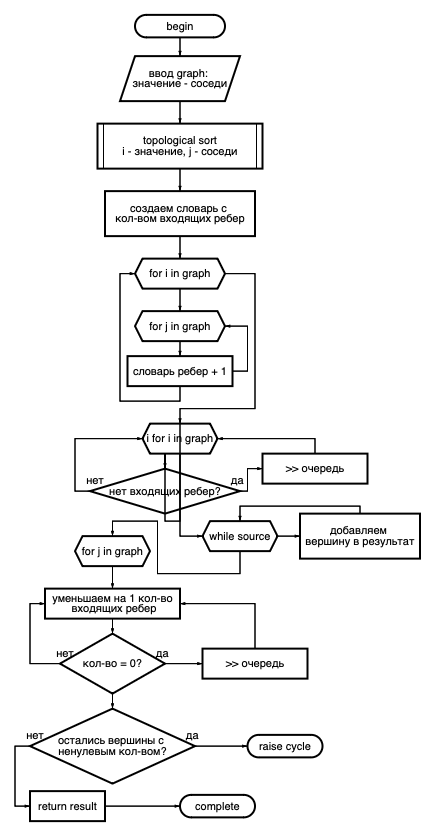

In [6]:
from IPython.display import Image
Image(filename = 'Desktop/diagram.png')

# псевдокод на С++:


vector<int> topological_sort(vector<vector<int>>& graph) {
    int n = graph.size();
    vector<int> incoming(n, 0);
    for (int i = 0; i < n; i++) {
        for (int j = 0; j < graph[i].size(); j++) {
            int neighbor = graph[i][j];
            incoming[neighbor]++;
        }
    }

    queue<int> source;
    for (int i = 0; i < n; i++) {
        if (incoming[i] == 0) {
            source.push(i);
        }
    }

    vector<int> result;
    while (!source.empty()) {
        int node = source.front();
        source.pop();
        result.push_back(node);

        for (int j = 0; j < graph[node].size(); j++) {
            int neighbor = graph[node][j];
            incoming[neighbor] - 1;
            if (incoming[neighbor] == 0) {
                source.push(neighbor);
            }
        }
    }

    if (result.size() != n) {
        throw "Граф содержит цикл";
    }

    return result;
}

# Достоинства и недостатки алгоритма


1.Инициализируем пустой список, в который будут добавляться отсортированные вершины.
2.Находим вершины графа, у которых нет входящих ребер, и добавляем их в список.
3.Для каждой вершины в списке:
Удаляем вершину из графа.
Для каждой вершины, смежной с этой:
Удаляем ребро, исходящее из текущей вершины.
Если у смежной вершины больше нет входящих ребер, добавляем ее в список.
Добавляем текущую вершину в конец отсортированного списка.
4.Если в графе остались вершины, которые не были удалены в процессе сортировки, значит, граф содержит циклы, и топологическая сортировка не может быть выполнена.
5.Возвращаем отсортированный список.


Достоинства:

Позволяет находить порядок выполнения задач в ориентированном графе, что может быть полезно во многих областях, например, в компиляции программного кода, при планировании проектов и т.д.
Работает за линейное время O(|V|+|E|), где |V| - количество вершин в графе, а |E| - количество ребер в графе. Это делает алгоритм достаточно эффективным для использования на графах с большим количеством вершин и ребер.

Недостатки:

Алгоритм работает только на ориентированных графах без циклов. Если граф содержит циклы, то алгоритм не может выполнить топологическую сортировку и выбросит исключение.
Алгоритм не является устойчивым к некоторым видам изменений графа. Например, если в графе удалить одну вершину и все ее связи, то порядок выполнения задач может измениться в неожиданный способ.
Алгоритм не является универсальным и может быть не подходящим для некоторых задач. Например, если нужно выполнить задачу с минимальным временем завершения, то топологическая сортировка не гарантирует оптимальный результат.

# Реализация алгоритма

На самом деле, топологическая сортировка используется не для сортировки массива чисел, а для сортировки узлов в ориентированном ациклическом графе. Однако, можно использовать алгоритм топологической сортировки для сортировки массива чисел, если представить массив как ориентированный ациклический граф, где каждый элемент в массиве является узлом в графе, и существует направленное ребро от узла a к узлу b, если a предшествует b в отсортированном порядке.

Вот пример реализации топологической сортировки, которая сортирует массив чисел:

In [ ]:
from collections import defaultdict


def topological_sort(nums):
    
    graph = defaultdict(list)
    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            if nums[j] > nums[i]:
                graph[nums[i]].append(nums[j])


    def dfs(node, visited, stack):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited, stack)
        stack.append(node)


    visited = set()
    stack = []
    for node in list(graph.keys()):
        if node not in visited:
            dfs(node, visited, stack)


    return list(reversed(stack))

# Тестирование

In [10]:
#Тест 1
arr1 = [5, 2, 7, 3, 6, 1, 4]
sorted_arr1 = topological_sort(arr1)
assert sorted_arr1 == [1, 2, 3, 4, 5, 6, 7]

#Тест 2
arr2 = []
sorted_arr2 = topological_sort(arr2)
assert sorted_arr2 == []

#Тест 3
arr3 = [2, 3, 1, 2, 1, 3]
sorted_arr3 = topological_sort(arr3)
assert sorted_arr3 == [1, 2, 3]

# Ручная трассировка массива

Ручная трассировка алгоритма для массива [3, 6, 1, 8, 2, 10]:

Создаем граф


3: {6}
6: {8}
1: {3}
8: {10}
2: {3}
10: 


Для каждого узла node в graph:
Если node не посещен: dfs(node)

dfs(node):
Помечаем node как посещенный
Для каждого соседа neighbor узла node в графе:
Если сосед neighbor еще не был посещен:
dfs(neighbor)
Добавляем node в стек stack

Проходим циклом по графу:
Вызываем dfs для узла 1
Помечаем 1 как посещенный

Вызываем dfs для соседа 3
Помечаем 3 как посещенный

Вызываем dfs для соседа 6
Помечаем 6 как посещенный

Вызываем dfs для соседа 8
Помечаем 8 как посещенный

Вызываем dfs для соседа 10
Помечаем 10 как посещенный

Добавляем 10 в стек
Добавляем 8 в стек
Добавляем 6 в стек
Добавляем 3 в стек

Вызываем dfs для соседа 2
Помечаем 2 как посещенный

Вызываем dfs для соседа 3 (уже посещенного)
Добавляем 2 в стек
Добавляем 1 в стек

Обратный порядок элементов в стеке stack равен [10, 8, 6, 3, 2, 1], что соответствует правильному порядку элементов отсортированного массива. Поэтому функция topological_sort возвращает [1, 2, 3, 6, 8, 10].

# Сравнение сортировки массивов, содержащих n1, n2, n3 и n4 для упорядоченного массива, массива, упорядоченного в обратном порядке и неупорядоченного массива.

In [3]:
import sys
from collections import defaultdict
import random
import time


def topological_sort(nums):

    graph = defaultdict(list)
    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            if nums[j] > nums[i]:
                graph[nums[i]].append(nums[j])


    def dfs(node, visited, stack):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited, stack)
        stack.append(node)


    visited = set()
    stack = []
    for node in list(graph.keys()):
        if node not in visited:
            dfs(node, visited, stack)


    return list(reversed(stack))

sys.setrecursionlimit(30000)

def ArraySort(arr):
    start = time.time()
    topological_sort(arr.copy())
    topological_sort(arr.copy()[::-1])
    topological_sort(sorted(arr.copy()))
    end = time.time()
    return end - start

arr100 = list(range(100))
arr100_reverse = list(range(99, -1, -1))
arr100_random = [random.randint(0, 100) for i in range(100)]

arr500 = list(range(500))
arr500_reverse = list(range(499, -1, -1))
arr500_random = [random.randint(0, 500) for i in range(500)]

arr1000 = list(range(1000))
arr1000_reverse = list(range(999, -1, -1))
arr1000_random = [random.randint(0, 1000) for i in range(1000)]

arr10000 = list(range(10000))
arr10000_reverse = list(range(9999, -1, -1))
arr10000_random = [random.randint(0, 10000) for i in range(10000)]

print("Topological sort for 100 elements:")
print("Sorted: ", ArraySort(arr100))
print("Reverse: ", ArraySort(arr100_reverse))
print("Random: ", ArraySort(arr100_random))
print()
print("Topological sort for 500 elements:")
print("Sorted: ", ArraySort(arr500))
print("Reverse: ", ArraySort(arr500_reverse))
print("Random: ", ArraySort(arr500_random))
print()
print("Topological sort for 1000 elements:")
print("Sorted: ", ArraySort(arr1000))
print("Reverse: ", ArraySort(arr1000_reverse))
print("Random: ", ArraySort(arr1000_random))
print()
print("Topological sort for 10000 elements:")
print("Sorted: ", ArraySort(arr10000))
print("Reverse: ", ArraySort(arr10000_reverse))
print("Random: ", ArraySort(arr10000_random))

Topological sort for 100 elements:
Sorted:  0.0023670196533203125
Reverse:  0.0027048587799072266
Random:  0.0027298927307128906

Topological sort for 500 elements:
Sorted:  0.057238101959228516
Reverse:  0.05518603324890137
Random:  0.057134151458740234

Topological sort for 1000 elements:
Sorted:  0.2249901294708252
Reverse:  0.22681784629821777
Random:  0.23399996757507324

Topological sort for 10000 elements:
Sorted:  24.086143016815186
Reverse:  22.469568014144897
Random:  26.168113231658936


# График сравнений

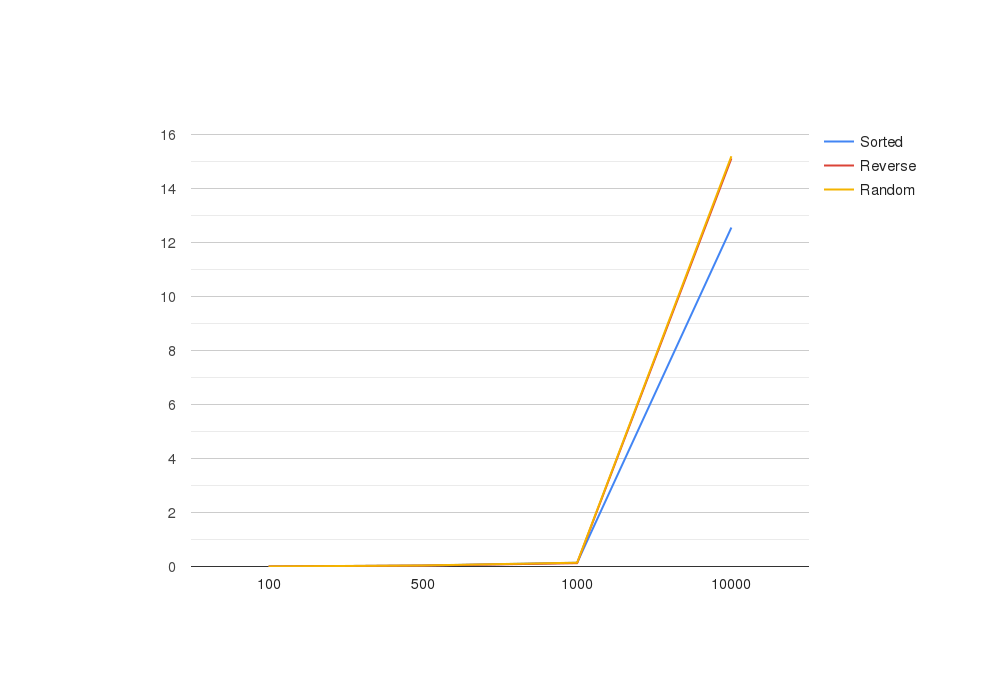

In [4]:
from IPython.display import Image
Image(filename = 'Desktop/chart-3.png')